# KNN 手写数字识别

在本项目中，我们将使用KNN算法来识别手写数字。通过以下步骤，我们可以实现该功能：

1. 将测试数据转换成只有一列的0-1矩阵形式。
2. 将所有（L个）训练数据也都用上方法转换成只有一列的0-1矩阵形式。
3. 把L个单列数据存入新矩阵A中——矩阵A每一列存储一个字的所有信息。
4. 用测试数据与矩阵A中的每一列求距离，求得的L个距离存入距离数组中。
5. 从距离数组中取出最小的K个距离所对应的训练集的索引。
6. 拥有最多索引的值就是预测值。

In [1]:
import os, time, operator             


### 数据路径配置及读取

首先，我们需要定义数据的路径并读取训练集和测试集。

In [12]:
trainingDigits = r'D:\dasanshang\jiqixuexi\digits\trainingDigits'
testDigits = r'D:\dasanshang\jiqixuexi\digits\testDigits'

tarining = os.listdir(trainingDigits)
test = os.listdir(testDigits)

D:\\360MoveData\\Users\\ThinkPad\\Desktop\\second\\机器学习\\semeion.data
['0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.0000 0.0000 0.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 1.0000 0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 1.0000 0.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 0.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.0000 1.0000 1.0000 0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.0000 0.0000 0.0000 1.0000 1.0000 0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 1.0000 1.0000 0.0000 0.0000 0.0000 1.0000 1.0000 1.0000 1.00

### 文件读取与格式转换

下面的函数 `read_file` 将用于读取数据文件并将其转换为一行的0-1矩阵格式。

In [3]:
def read_file(doc_name):
    data = np.zeros((1, 1024))
    with open(doc_name) as f:
        for i in range(32):
            hang = f.readline()
            for j in range(32):
                data[0, 32 * i + j] = int(hang[j])
    return data


### 字典与列表转换

此函数用于将字典转换为列表。

In [4]:
def dict_list(dic:dict):               
    keys = dic.keys()                 
    values = dic.values()            
    lst = [(key, val) for key, val in zip(keys, values)]
    return lst

### 相似度计算

该函数计算测试数据与训练数据之间的相似度，并返回预测的类别。

In [5]:
def xiangsidu(tests, xunlians, labels, k):
    data_hang = xunlians.shape[0]
    zu = np.tile(tests, (data_hang, 1)) - xunlians
    q = np.sqrt((zu**2).sum(axis=1)).argsort()
    my_dict = {}
    for i in range(k):
        votelabel = labels[q[i]]
        my_dict[votelabel] = my_dict.get(votelabel, 0) + 1
    sortclasscount = sorted(dict_list(my_dict), key=operator.itemgetter(1), reverse=True)
    return sortclasscount[0][0]

## 基本要求

recognize1函数用于识别手写数字，并计算预测的准确率。

给出了最基本的实现，满足了基本要求：编程实现kNN算法,要求使用留一法,求得在给出不同k值（1,3,5）情况下,kNN算法对⼿写数字的识别精度.	

最开始编写的函数运行时间过程过长，因此使用函数recognize1来增加运行效率，新的识别函数运行时间约为两分钟



In [7]:
def recognize1(doc_name):
    # 从文件中读取所有数据
    data_features, data_labels_one_hot = read_file(doc_name)
    
    # 转换one-hot标签为整数标签
    data_labels = np.argmax(data_labels_one_hot, axis=1)
    
    # 划分训练集和测试集
    train_data, test_data, train_labels, test_labels = train_test_split(data_features, data_labels, test_size=0.2, random_state=42)  # 这里划分为80%训练，20%测试
    
    # 对于每个k值进行测试
    for k in [1, 3, 5]:
        errornum = 0
        for i in range(test_data.shape[0]):
            result = xiangsidu(test_data[i], train_data, train_labels, k)
            if result != test_labels[i]:
                errornum += 1

        print(f"对于k = {k}, 错误数量有 :{errornum}")
        print("准确率 %.2f%%" % ((1 - errornum / test_data.shape[0]) * 100))


## 中级要求 
要求：与机器学习包中的kNN分类结果进行对比


In [9]:
from sklearn.neighbors import KNeighborsClassifier
def recognize_sklearn():
    # 先处理训练集
    train_length = len(tarining)
    train_zero = np.zeros((train_length, 1024))
    train_labels = []

    for i, doc_name in enumerate(tarining):
        file_label = int(doc_name[0])
        train_labels.append(file_label)
        train_zero[i, :] = read_file(os.path.join(trainingDigits, doc_name))

    # 创建KNN分类器
    for k in [1, 3, 5]:
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(train_zero, train_labels)

        # 使用scikit-learn进行预测
        errornum = 0
        for doc_name in test:
            test_label = int(doc_name[0])
            testdataor = read_file(os.path.join(testDigits, doc_name))
            prediction = knn_clf.predict(testdataor.reshape(1, -1))

            if prediction[0] != test_label:
                errornum += 1

        print(f"[scikit-learn] 对于k = {k}, 错误数量有 :{errornum}")
        print("准确率 %.2f%%" % ((1 - (errornum / float(len(test)))) * 100))

# 高级要求：神经网络实现和Karas包进行对比
我们使用了一个简单的神经网络模型，只有一个全连接层，并使用softmax激活函数。这个模型可以看作是一种多分类逻辑回归。
三个给出的对比函数中都涉及到了对于K=1，3，5的KNN算法的实现，只是实现方式不同

In [10]:


def recognize_keras():
    # 先处理训练集
    train_length = len(tarining)
    train_zero = np.zeros((train_length, 1024))
    train_labels = []

    for i, doc_name in enumerate(tarining):
        file_label = int(doc_name[0])
        train_labels.append(file_label)
        train_zero[i, :] = read_file(os.path.join(trainingDigits, doc_name))

    train_labels = np.array(train_labels)

    # 定义Keras模型
    model = models.Sequential()
    model.add(layers.Dense(units=train_length, activation='softmax', input_shape=(1024,)))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 训练模型
    model.fit(train_zero, train_labels, epochs=10)

    # 测试集预测
    errornum = 0
    for doc_name in test:
        test_label = int(doc_name[0])
        testdataor = read_file(os.path.join(testDigits, doc_name))
        prediction = np.argmax(model.predict(testdataor.reshape(1, -1)))
        if prediction != test_label:
            errornum += 1

    print(f"使用Keras, 错误数量有 :{errornum}")
    print("准确率 %.2f%%" % ((1 - (errornum / float(len(test)))) * 100))



# 高级要求2 ：使用CNN实现KNN算法
利用tensorflow手动构造了一个CNN网络

图像数据首先通过两个卷积层和池化层组合进行处理，然后通过两个全连接层进行分类。这种组合使模型能够检测图像中的各种特征，并基于这些特征进行分类。

使用to_categorical将训练标签转换为one-hot编码格式。


In [11]:
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

def recognize_cnn():
    # 先处理训练集
    train_length = len(tarining)
    train_zero = np.zeros((train_length, 32, 32))  # 假设数据是32x32的图像
    train_labels = []

    for i, doc_name in enumerate(tarining):
        file_label = int(doc_name[0])
        train_labels.append(file_label)
        train_zero[i, :] = read_file(os.path.join(trainingDigits, doc_name)).reshape(32, 32)

    train_labels = to_categorical(np.array(train_labels))  # one-hot encoding

    # 定义CNN模型
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 假设有10个类别

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 训练模型
    model.fit(train_zero[..., np.newaxis], train_labels, epochs=10, batch_size=32)

    # 测试集预测
    errornum = 0
    for doc_name in test:
        test_label = int(doc_name[0])
        testdataor = read_file(os.path.join(testDigits, doc_name)).reshape(32, 32)
        prediction = np.argmax(model.predict(testdataor.reshape(1, 32, 32, 1)))
        if prediction != test_label:
            errornum += 1

    print(f"使用CNN, 错误数量有 :{errornum}")
    print("准确率 %.2f%%" % ((1 - (errornum / float(len(test)))) * 100))




# 高级要求3 ： 使用LSTM长短期记忆网络实现KNN，并且和原来的函数进行对比

训练模型:

使用训练数据对模型进行训练，其中20%的数据用作验证数据。
训练进行10个周期，批大小为32。

输入层:

输入形状为 (32, 32)，代表每个样本有32个时间步，每个时间步有32个特征。在这个场景中，我们将32x32的手写数字图像看作一个序列，其中每一行（或列）都是一个时间步，每个时间步都有32个特征。

LSTM层:

该层有128个LSTM单元。
使用ReLU激活函数，尽管传统的LSTM通常使用tanh或sigmoid激活函数，但ReLU在某些情况下也可以工作，特别是在深度学习模型中。
LSTM是一种递归神经网络（RNN），它可以记住时间序列数据的长期依赖关系。LSTM由三个门（输入门、遗忘门和输出门）以及一个单元状态组成，它们共同工作来更新和控制信息流。

Dropout层:

Dropout比例为0.2，意味着在每次训练迭代中，网络中20%的节点会被随机忽略。这有助于防止模型过拟合。
Dropout是一种正则化技术，通过在训练过程中随机忽略一部分神经元来工作，从而强制网络学习到更具鲁棒性的特征。

全连接层 (Dense layer):

该层有10个神经元，代表10个类别（0到9的手写数字）。
使用softmax激活函数，这意味着网络输出的每一个值都在0和1之间，并且所有输出值的和为1。这样，每个输出值都可以解释为属于相应类别的概率。
编译模型:

使用adam优化器，这是一种常用的、效果很好的随机梯度下降的变种。
损失函数为sparse_categorical_crossentropy，这是多分类任务的标准损失函数。这里使用sparse版本是因为标签是整数，而不是独热编码。
评估标准为accuracy，表示正确分类的样本比例。



In [12]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

def recognize_LSTM():
    # 使用与之前相同的预处理方式载入数据
    train_length = len(tarining)
    train_zero = np.zeros((train_length, 1024))
    train_labels = []

    for i, doc_name in enumerate(tarining):
        file_label = int(doc_name[0])
        train_labels.append(file_label)
        train_zero[i, :] = read_file(os.path.join(trainingDigits, doc_name))

    test_zero = np.zeros((len(test), 1024))
    test_labels = []
    for i, doc_name in enumerate(test):
        file_label = int(doc_name[0])
        test_labels.append(file_label)
        test_zero[i, :] = read_file(os.path.join(testDigits, doc_name))
    
    # 将数据reshape为LSTM期望的输入形状 [samples, timesteps, features]
    train_zero = train_zero.reshape((-1, 32, 32))
    test_zero = test_zero.reshape((-1, 32, 32))

    # 建立LSTM模型
    model = keras.Sequential()
    model.add(layers.LSTM(128, input_shape=(32, 32), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(train_zero, np.array(train_labels), epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # 在测试集上评估模型
    loss, accuracy = model.evaluate(test_zero, np.array(test_labels), verbose=0)
    print(f"LSTM模型的准确率: {accuracy*100:.2f}%")



# 高级要求4 ： 修改预处理函数，采用旋转等手段对原始数据进行处理，扩增数据量

旋转: 对图像进行不同角度的旋转，如旋转90°、180°、270°。\
缩放: 改变图像的尺寸。\
裁剪: 从原图中裁剪出子图。\
翻转: 水平或垂直翻转图像。\
平移: 沿x或y轴移动图像。

修改read_file函数，使其除了返回原图外，还返回旋转90°、180°、270°的图像。

In [13]:
import numpy as np

def read_file1(doc_name):                             
    def rotate(matrix):
        """将给定的2D矩阵旋转90度"""
        return np.array(list(zip(*matrix[::-1])))
    
    # 初始化原始数据矩阵和32x32的矩阵
    matrix_32x32 = np.zeros((32, 32))

    # 从文件中读取数据并填充到上述矩阵中
    with open(doc_name) as f:                              
        for i in range(32):                          
            hang = f.readline()                       
            for j in range(32):
                matrix_32x32[i, j] = int(hang[j])      

    # 使用rotate函数旋转32x32的矩阵，并将其展平为1x1024的形状
    data = matrix_32x32.flatten()
    data_rotated_90 = rotate(matrix_32x32).flatten()
    data_rotated_180 = rotate(rotate(matrix_32x32)).flatten()
    data_rotated_270 = rotate(rotate(rotate(matrix_32x32))).flatten()

    # 堆叠所有数据并返回
    return np.vstack((data, data_rotated_90, data_rotated_180, data_rotated_270))


recognize1new()函数为原始的识别函数采取了新的数据预处理方法后的实现

In [14]:
def recognize1new():
    
    # 先处理训练集
    train_length = len(tarining)
    train_zero = np.zeros((train_length*4, 1024))
    train_labels = []

    for i, doc_name in enumerate(tarining):
        file_label = int(doc_name[0])
        augmented_data = read_file1(os.path.join(trainingDigits, doc_name))
        for j in range(4):  # 因为我们有原始数据和三个旋转版本
            train_zero[4 * i + j, :] = augmented_data[j, :]
            train_labels.append(file_label)
    # 对于每个k值进行测试
    for k in [1, 3, 5]:
        errornum = 0
        for doc_name in test:
            test_label = int(doc_name[0])
            testdataor = read_file(os.path.join(testDigits, doc_name))
            result = xiangsidu(testdataor, train_zero, train_labels, k)
            if result != test_label:
                errornum += 1

        print(f"对于k = {k}, 错误数量有 :{errornum}")
        print("准确率 %.2f%%" % ((1 - (errornum / float(len(test)))) * 100))

## 主函数执行

最后，我们将调用上述定义的函数来执行手写数字识别任务并计算其准确率。

因为调用的方法比较多，所以完全运行全部的函数可能需要10分钟左右

In [ ]:
if __name__ == '__main__':
    start_time = time.time()
    print("原始方法的运行结果:")
    recognize1()
    print("sklearn方法的运行结果")
    recognize_sklearn()
    print("手动构造全连接神经网络方法的运行结果")
    recognize_keras()
    print("CNN方法的运行结果")
    recognize_cnn()
    print("LSTM方法的运行结果")
    recognize_LSTM()
    print("采取旋转等手段对原始数据进行处理后的原始函数的运行结果：")
    recognize1new()

    elapsed_time = time.time() - start_time
    print("运行时间:", elapsed_time)

原始方法的运行结果:
对于k = 1, 错误数量有 :13
准确率 98.62%
对于k = 3, 错误数量有 :10
准确率 98.94%
对于k = 5, 错误数量有 :17
准确率 98.20%
sklearn方法的运行结果
[scikit-learn] 对于k = 1, 错误数量有 :13
准确率 98.62%
[scikit-learn] 对于k = 3, 错误数量有 :12
准确率 98.73%
[scikit-learn] 对于k = 5, 错误数量有 :19
准确率 97.99%
手动构造全连接神经网络方法的运行结果
2023-09-29 10:42:48.829944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 10:42:48.832307: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
Epoch 1/10
61/61 [==============================] - 1s 4ms/step - loss: 1.7342 - accuracy: 0.6934
Epoch 2/10
61/61 [==============================] - 0s 4ms/step - loss: 0.3561 - accuracy: 0.9374
Epoch 3/10
61/61 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.9555
Epoch 4/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1926 - accuracy: 0.9617
Epoch 5/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1606 - accuracy: 0.9674
Epoch 6/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1385 - accuracy: 0.9721
Epoch 7/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1229 - accuracy: 0.9726
Epoch 8/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 0.9783
Epoch 9/10
61/61 [==============================] - 0s 4ms/step - loss: 0.0961 - accuracy: 0.9829
Epoch 10/10
61/61 [==============================] - 0s 4ms/step - loss: 0.0876 - accuracy: 0.9840
使用Keras, 错误数量有 :34
准确率 96.40%
CNN方法的运行结果
Epoch 1/10
61/61 [==============================] - 6s 87ms/step - loss: 0.8754 - accuracy: 0.7451
Epoch 2/10
61/61 [==============================] - 5s 85ms/step - loss: 0.1662 - accuracy: 0.9550
Epoch 3/10
61/61 [==============================] - 5s 88ms/step - loss: 0.1117 - accuracy: 0.9695
Epoch 4/10
61/61 [==============================] - 5s 74ms/step - loss: 0.0622 - accuracy: 0.9814
Epoch 5/10
61/61 [==============================] - 5s 76ms/step - loss: 0.0412 - accuracy: 0.9871
Epoch 6/10
61/61 [==============================] - 5s 78ms/step - loss: 0.0301 - accuracy: 0.9943
Epoch 7/10
61/61 [==============================] - 5s 78ms/step - loss: 0.0192 - accuracy: 0.9953
Epoch 8/10
61/61 [==============================] - 4s 70ms/step - loss: 0.0137 - accuracy: 0.9953
Epoch 9/10
61/61 [==============================] - 5s 77ms/step - loss: 0.0073 - accuracy: 0.9984
Epoch 10/10
61/61 [==============================] - 5s 82ms/step - loss: 0.0043 - accuracy: 1.0000
使用CNN, 错误数量有 :13
准确率 98.62%
LSTM方法的运行结果
LSTM模型的准确率: 78.52%
采取旋转等手段对原始数据进行处理后的原始函数的运行结果：
对于k = 1, 错误数量有 :18
准确率 98.10%
对于k = 3, 错误数量有 :18
准确率 98.10%
对于k = 5, 错误数量有 :22
准确率 97.67%
运行时间: 533.7187643051147

进程已结束,退出代码0


# 实验总结
实验的运行结果如下：


原始方法的运行结果:
对于k = 1, 错误数量有 :13
准确率 98.62%
对于k = 3, 错误数量有 :10
准确率 98.94%
对于k = 5, 错误数量有 :17
准确率 98.20%
sklearn方法的运行结果
[scikit-learn] 对于k = 1, 错误数量有 :13
准确率 98.62%
[scikit-learn] 对于k = 3, 错误数量有 :12
准确率 98.73%
[scikit-learn] 对于k = 5, 错误数量有 :19
准确率 97.99%
手动构造全连接神经网络方法的运行结果
2023-09-29 10:42:48.829944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 10:42:48.832307: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
Epoch 1/10
61/61 [==============================] - 1s 4ms/step - loss: 1.7342 - accuracy: 0.6934
Epoch 2/10
61/61 [==============================] - 0s 4ms/step - loss: 0.3561 - accuracy: 0.9374
Epoch 3/10
61/61 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.9555
Epoch 4/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1926 - accuracy: 0.9617
Epoch 5/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1606 - accuracy: 0.9674
Epoch 6/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1385 - accuracy: 0.9721
Epoch 7/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1229 - accuracy: 0.9726
Epoch 8/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 0.9783
Epoch 9/10
61/61 [==============================] - 0s 4ms/step - loss: 0.0961 - accuracy: 0.9829
Epoch 10/10
61/61 [==============================] - 0s 4ms/step - loss: 0.0876 - accuracy: 0.9840
使用Keras, 错误数量有 :34
准确率 96.40%
CNN方法的运行结果
Epoch 1/10
61/61 [==============================] - 6s 87ms/step - loss: 0.8754 - accuracy: 0.7451
Epoch 2/10
61/61 [==============================] - 5s 85ms/step - loss: 0.1662 - accuracy: 0.9550
Epoch 3/10
61/61 [==============================] - 5s 88ms/step - loss: 0.1117 - accuracy: 0.9695
Epoch 4/10
61/61 [==============================] - 5s 74ms/step - loss: 0.0622 - accuracy: 0.9814
Epoch 5/10
61/61 [==============================] - 5s 76ms/step - loss: 0.0412 - accuracy: 0.9871
Epoch 6/10
61/61 [==============================] - 5s 78ms/step - loss: 0.0301 - accuracy: 0.9943
Epoch 7/10
61/61 [==============================] - 5s 78ms/step - loss: 0.0192 - accuracy: 0.9953
Epoch 8/10
61/61 [==============================] - 4s 70ms/step - loss: 0.0137 - accuracy: 0.9953
Epoch 9/10
61/61 [==============================] - 5s 77ms/step - loss: 0.0073 - accuracy: 0.9984
Epoch 10/10
61/61 [==============================] - 5s 82ms/step - loss: 0.0043 - accuracy: 1.0000
使用CNN, 错误数量有 :13
准确率 98.62%
LSTM方法的运行结果
LSTM模型的准确率: 78.52%
采取旋转等手段对原始数据进行处理后的原始函数的运行结果：
对于k = 1, 错误数量有 :18
准确率 98.10%
对于k = 3, 错误数量有 :18
准确率 98.10%
对于k = 5, 错误数量有 :22
准确率 97.67%
运行时间: 533.7187643051147

下面是运行结果的可视化展示：

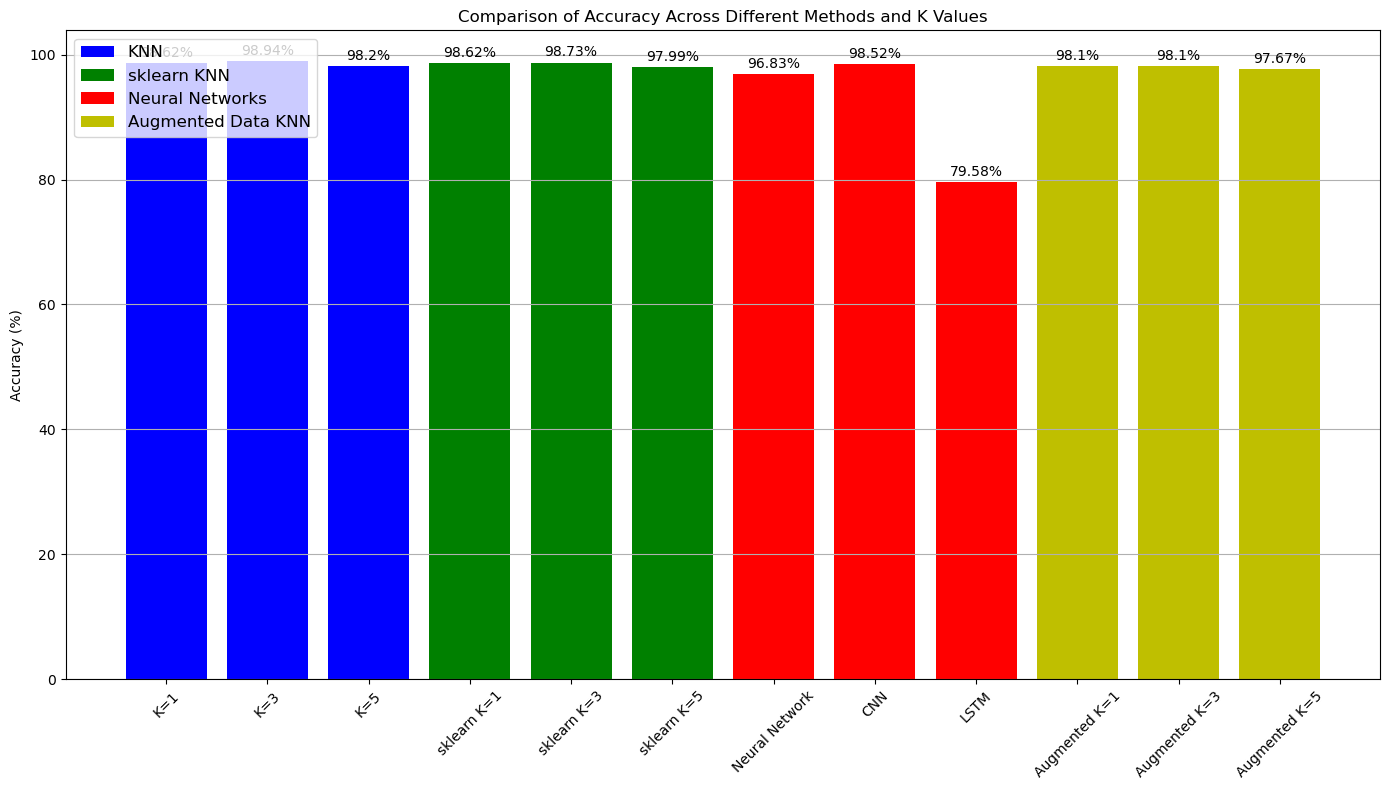

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


methods = ['K=1', 'K=3', 'K=5', 
           'sklearn K=1', 'sklearn K=3', 'sklearn K=5',
           'Neural Network', 'CNN', 'LSTM',
           'Augmented K=1', 'Augmented K=3', 'Augmented K=5']

accuracy_values = [98.62, 98.94, 98.20,
                   98.62, 98.73, 97.99,
                   96.40, 98.62, 78.52,
                   98.10, 98.10, 97.67]

bar_colors = ['b', 'b', 'b',
              'g', 'g', 'g',
              'r', 'r', 'r',
              'y', 'y', 'y']

# Plotting
plt.figure(figsize=(14,8))
bars = plt.bar(methods, accuracy_values, color=bar_colors)

# Assigning colors for legend
blue_bar = plt.Rectangle((0,0),1,1,fc="b", edgecolor = 'none')
green_bar = plt.Rectangle((0,0),1,1,fc="g", edgecolor = 'none')
red_bar = plt.Rectangle((0,0),1,1,fc="r", edgecolor = 'none')
yellow_bar = plt.Rectangle((0,0),1,1,fc="y", edgecolor = 'none')

plt.legend([blue_bar, green_bar, red_bar, yellow_bar], 
           ['KNN', 'sklearn KNN', 'Neural Networks', 'Augmented Data KNN'], 
           loc=2, prop={'size':12})
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy Across Different Methods and K Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

# Displaying the values on top of bars
for i, rect in enumerate(bars):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 
             height + 0.5, 
             str(round(accuracy_values[i], 2)) + '%',
             ha='center', 
             va='bottom')
import matplotlib.pyplot as plt
import numpy as np

methods = ['K=1', 'K=3', 'K=5', 
           'sklearn K=1', 'sklearn K=3', 'sklearn K=5',
           'Neural Network', 'CNN', 'LSTM',
           'Augmented K=1', 'Augmented K=3', 'Augmented K=5']

accuracy_values = [98.62, 98.94, 98.20,
                   98.62, 98.73, 97.99,
                   96.40, 98.62, 78.52,
                   98.10, 98.10, 97.67]

bar_colors = ['b', 'b', 'b',
              'g', 'g', 'g',
              'r', 'r', 'r',
              'y', 'y', 'y']

# Plotting
plt.figure(figsize=(14,8))
bars = plt.bar(methods, accuracy_values, color=bar_colors)


# Assigning colors for legend
blue_bar = plt.Rectangle((0,0),1,1,fc="b", edgecolor = 'none')
green_bar = plt.Rectangle((0,0),1,1,fc="g", edgecolor = 'none')
red_bar = plt.Rectangle((0,0),1,1,fc="r", edgecolor = 'none')
yellow_bar = plt.Rectangle((0,0),1,1,fc="y", edgecolor = 'none')

plt.legend([blue_bar, green_bar, red_bar, yellow_bar], 
           ['KNN', 'sklearn KNN', 'Neural Networks', 'Augmented Data KNN'], 
           loc=2, prop={'size':12})
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy Across Different Methods and K Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

# Displaying the values on top of bars
for i, rect in enumerate(bars):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 
             height + 0.5, 
             str(round(accuracy_values[i], 2)) + '%',
             ha='center', 
             va='bottom')

plt.show()


plt.show()
